# 강의영상 

> youtube: <https://youtube.com/playlist?list=PLQqh36zP38-w6PeAXdc4YcGTb7M_67Wog> 

# imports 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# 지난시간 

`-` 수학: 어떠한 집합 $E$에서 equivalence relation $\sim$을 정의할 수 있다면, 집합 $E$의 모든 원소는 $\sim$를 기준으로 분해할 수 있다. 즉 아래를 만족하는 $E_1,E_2,E_3,\dots$ 이 존재한다. 

$$E = \uplus_{k=1}^{\infty} E_k$$

단 여기에서 $E_1,E_2,E_3,\dots$ 는 서로소이다. 

`-` 통계: 확률변수열 $\{X_t\}$가 HMC라고 하고, $E$를 $\{X_t\}$가 정의되는 상태공간이라고 하자. 기호 $\leftrightarrow$는 $E$에서 정의된 euivalence relation이 된다. 따라서 집합 $E$의 원소는 $\leftrightarrow$를 기준으로 아래와 같이 나눌 수 있다. 

$$E = \uplus_{k=1}^{\infty} E_k$$

단 여기에서 $E_1,E_2,E_3,\dots$ 는 서로소이다. 

`-` 의미($\star\star\star$)

1. IRR 하지 않은 마코프체인은 IRR 한 마코프체인으로 분해하여 생각할 수 있다. 
2. 앞으로 마코프체인에 대한 성질을 연구할때 IRR 은 그냥 가정해도 무방하다. 

`-` 예시1: 아래와 같은 전이행렬을 고려하자. 

In [2]:
P = np.array([[1,0],
              [0,1]])
P

array([[1, 0],
       [0, 1]])

**해석1**: 모든 분포가 정상분포라고 해석 

**해석2:** 전체마코프체인을 쪼개서 (1) 상태0에만 머무는 마코프체인, (2) 상태1에만 머무는 마코프체인으로 나누어 생각하고 각각에 대한 정상분포가 1이라고 해석.

`-` 예시2: 아래와 같은 전이행렬을 고려하자. 

In [3]:
P = np.array([[1,0,0,0],
              [0,1,0,0],
              [0,0,0,1],
              [0,0,1,0]])
P

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

**해석:** 전체마코프체인을 쪼개서 (1) 상태0에만 머무는 마코프체인, (2) 상태1에만 머무는 마코프체인 (3) 상태 2,3을 셔플하는 마코프체인으로 생각하자. 즉 상태공간을 아래와 같이 분리하자. 

$$E = E_1 \uplus E_2 \uplus E_3 = \{0\} \uplus \{1\} \uplus \{2,3\}$$

각 상태공간에 대응하는 마코프체인의 정상분포를 ${\boldsymbol \pi}_1^\top,{\boldsymbol \pi}_2^\top,{\boldsymbol \pi}_3^\top$ 이라고 하자. 전체 정상분포 ${\boldsymbol \pi}$는 아래를 만족하는 어떠한 분포라도 무관하다. 

$${\boldsymbol \pi} = a{\boldsymbol \pi}_1+b{\boldsymbol \pi}_2+c{\boldsymbol \pi}_3.$$ 

단, 여기에서 $a+b+c=1$ 이고 $a,b,c$는 모두 양수이다. 

In [4]:
a= 0.1 
b= 0.5
c= 1-a-b 
π = np.array([a,b,0.5*c, 0.5*c]).reshape(4,1) 
π.T @ P, π.T 

(array([[0.1, 0.5, 0.2, 0.2]]), array([[0.1, 0.5, 0.2, 0.2]]))

# 예비학습 

## 나그네 

`-` 나그네 (박목월)

```
강나루 건너서
밀밭 길을

구름에 달 가듯이
가는 나그네

길은 외줄기
南道 삼백리

술 익는 마을마다
타는 저녁놀

구름에 달 가듯이
가는 나그네
```

`-` 나그네 

- 정착 X 
- 모든 장소에 일시적(transient)으로만 머뭄
- 다시 돌아올 수는 있는데 금방 다시 감. 

`-` 편의상 아래와 같이 생각하자. 

- $E$: 마을의 집합
- $X_t=i$: $t$시점에 나그네가 마을 $i$에 머무는 event 

## 급수의 수렴 

`-` $a_n \to 0$ 이라고 해서 $\lim_{n\to\infty} S_n <\infty$ 인건 아니다. 

`-` 예시1: $a_n=\frac{1}{2^n}$, 수렴하는 경우 

In [5]:
sum([1/2**i for i in range(1,10000)])

1.0

`-` 예시2: $a_n = \frac{1}{n}$, 수렴안하는 경우

In [6]:
sum([1/i for i in range(1,10000)])

9.787506036044348

# nature

## 예제1: 오른쪽으로만 갈래 

확률변수열 $\{X_t\}$가 HMC라고 하고, 그 transition matrix ${\bf P}$ (혹은 그 비슷한 것) 가 아래와 같다고 하자. 

$${\bf P} = \begin{bmatrix} 
0 & 1 & 0 & 0 & 0 & \dots \\ 
0 & 0 & 1 & 0 & 0 & \dots \\ 
0 & 0 & 0 & 1 & 0 & \dots \\ 
0 & 0 & 0 & 0 & 1 & \dots \\ 
\dots & \dots & \dots & \dots & \dots & \dots 
\end{bmatrix}$$

`-` 체크: 이 예제의 마코프체인은 IRR 하지 않다. 

`-` 나이스케이스: $\bar{\boldsymbol \pi}^\top \overset{T \to \infty}{\longrightarrow} {\bf p}_{\star}^\top = {\boldsymbol \pi}^\top$

`-` 이 예제는 나이스하지 않음 왜? IRR이 아니라서? 

- IRR이 아니라서 나이스하지 않다는 것은 핑계임. 
- 오른쪽으로 갈 확률을 0.99로 수정한다면 IRR 마코프체인이 된다. 그렇지만 이게 나이스하게 바뀔 것 같지는 않음. 

`-` 나이스하지 않은 본질적인 이유

- 상태 $i$에 일시적(transient)으로 머무는 느낌. 거의 나그네 수준임. 
- $\bar{\boldsymbol \pi}^\top \overset{T \to \infty}{\longrightarrow} {\bf p}_{\star}^\top = {\boldsymbol \pi}^\top$ 이와 같은 논리전개를 쓰려면 일단 $\{X_t\}$가 특정상태를 무한번 방문해야 가능 

`-` FINITE case

- IRR은 가정할 수 있음. 
- IRR을 가정한다면, 모든 마을에 대해서 나그네가 반복적으로 돌아오는 느낌이 있음. 


`-` 깨달음. 

- FINITE 인 경우는 IRR 이기만 하면 "반복적으로 마을방문" 이 보장되었다. 
- 그런데 INFINITE 한 경우는 IRR 이어도 "반복적으로 마을방문" 이 보장되지 않는다. 

> IRR 조건이 엄청 대단한 조건인줄 알았는데, 사실 그런게 아니고 (수틀리면 그냥 IRR 이라고 가정해도 무방한) 실제로 대단한 조건은 숨어있는 "반복적으로 마을방문" 이라는 조건임. 

`-` **가짜정의:** HMC $\{X_t\}$가 (1) IRR (2) PR (3) AP 조건을 만족한다면 $\{X_t\}$를 에르고딕 마코프체인이라고 부른다. 여기에서 PR은 positive recurrent의 약자이며 "반복적으로 마을을 방문한다"의 의미를 가지고 있다. 

## Reccurent, Transient

`-` **대안정의**: $\{X_t\}$가 상태공간 $E$에서 정의된 HMC 라고 하자. 만약에 상태 $i \in E$ 가 아래의 식을 만족한다면

$$\sum_{t=0}^{\infty} p_{ii}^{(t)}= \infty$$

$i$는 recurrent 하다고 표현하고, 그렇지 않으면 $i$는 transient 하다고 표현한다. 

## 예제2: reflecting random walk 

확률변수열 $\{X_t\}$가 HMC라고 하고, 그 transition matrix ${\bf P}$ (혹은 그 비슷한 것) 가 아래와 같다고 하자. 

$${\bf P} = \begin{bmatrix} 
1-p & p & 0 & 0 & 0 & \dots \\ 
1-p & 0 & p & 0 & 0 & \dots \\ 
0 & 1-p & 0 & p & 0 & \dots \\ 
0 & 0 & 1-p & 0 & p & \dots \\ 
\dots & \dots & \dots & \dots & \dots & \dots 
\end{bmatrix}$$

`-` 체크: 이 마코프체인은 IRR하다. 

`-` case1: $p=0.99$ 라고 하자. 

In [8]:
p=0.99
P1 = np.array([[i-j == 1 for i in range(1000)] for j in range(1000)])*p
P2 = np.array([[j-i == 1 for i in range(1000)] for j in range(1000)])*(1-p)
P = P1+P2
P[0,0]= 1-p 
P

array([[0.01, 0.99, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.99, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.  , ..., 0.  , 0.01, 0.  ]])

In [9]:
(np.matrix(P)**100).round(5)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

모든 상태가 일시적인듯 

`-` case2: $p=0.1$ 이라고 하자.

In [10]:
p=0.1
P1 = np.array([[i-j == 1 for i in range(1000)] for j in range(1000)])*p
P2 = np.array([[j-i == 1 for i in range(1000)] for j in range(1000)])*(1-p)
P = P1+P2
P[0,0]= 1-p 
P

array([[0.9, 0.1, 0. , ..., 0. , 0. , 0. ],
       [0.9, 0. , 0.1, ..., 0. , 0. , 0. ],
       [0. , 0.9, 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0.1, 0. ],
       [0. , 0. , 0. , ..., 0.9, 0. , 0.1],
       [0. , 0. , 0. , ..., 0. , 0.9, 0. ]])

In [11]:
(np.matrix(P)**100).round(5)

array([[0.88889, 0.09877, 0.01097, ..., 0.     , 0.     , 0.     ],
       [0.88889, 0.09877, 0.01097, ..., 0.     , 0.     , 0.     ],
       [0.88889, 0.09877, 0.01097, ..., 0.     , 0.     , 0.     ],
       ...,
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ]])

상태0은 recurrent 인듯 

`-` case3: $p=0.5$ 이라고 하자.

In [12]:
p=0.5
P1 = np.array([[i-j == 1 for i in range(1000)] for j in range(1000)])*p
P2 = np.array([[j-i == 1 for i in range(1000)] for j in range(1000)])*(1-p)
P = P1+P2
P[0,0]= 1-p 
P

array([[0.5, 0.5, 0. , ..., 0. , 0. , 0. ],
       [0.5, 0. , 0.5, ..., 0. , 0. , 0. ],
       [0. , 0.5, 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 0.5, 0. , 0.5],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ]])

In [13]:
(np.matrix(P)**1000).round(3)

array([[0.025, 0.025, 0.025, ..., 0.   , 0.   , 0.   ],
       [0.025, 0.025, 0.025, ..., 0.   , 0.   , 0.   ],
       [0.025, 0.025, 0.025, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

모르겠는데?? 

**대충 맞춰보자.** 

In [14]:
Pstar = P.copy()
pT = list()
pT.append(Pstar[0,0])
for t in range(10000):
    Pstar = Pstar@P
    pT.append(Pstar[0,0])    
np.array(pT).cumsum()

array([  0.5       ,   1.        ,   1.375     , ..., 157.58090143,
       157.58888008, 157.59685793])

여기에서 

- ${\tt pT} = [p_{00}^{(0)},p_{00}^{(1)},\dots,p_{00}^{(T)}]$
- ${\tt np.array(pT).cumsum()} = [\sum_{t=0}^{0} p_{00}^{(t)},\sum_{t=0}^{1} p_{00}^{(t)},\dots,\sum_{t=0}^{T} p_{00}^{(t)}]$

이다. 

`-` 결론: 
    
- 경우1: $p>1/2$ $\Rightarrow$ $\sum_{t=0}^{\infty} p_{00}^{(t)}<\infty$ $\overset{def}{\Leftrightarrow}$ state 0 is transient
- 경우2: $p<1/2$ $\Rightarrow$ $\sum_{t=0}^{\infty}p_{00}^{(t)}=\infty$ with $p_{00}^{(t)} \rightarrow c$, $c>0$ $\overset{def}{\Leftrightarrow}$ state 0 is positive recurrent
- 경우3: $p=1/2$ $\Rightarrow$ $\sum_{t=0}^{\infty} p_{00}^{(t)}=\infty$ with $p_{00}^{(t)} \rightarrow 0$ $\overset{def}{\Leftrightarrow}$ state 0 is null recurrent 

`-` 시각화

In [15]:
def calculate_pT(p): 
    _P1 = np.array([[i-j == 1 for i in range(1000)] for j in range(1000)])*p
    _P2 = np.array([[j-i == 1 for i in range(1000)] for j in range(1000)])*(1-p)
    P = _P1+_P2
    P[0,0]= 1-p 
    
    Pstar = P.copy()
    pT = list()
    pT.append(Pstar[0,0])
    for t in range(1000):
        Pstar = Pstar@P
        pT.append(Pstar[0,0])    
    return np.array(pT)

In [17]:
case1 = calculate_pT(0.55)
case2 = calculate_pT(0.45)
case3 = calculate_pT(0.50)

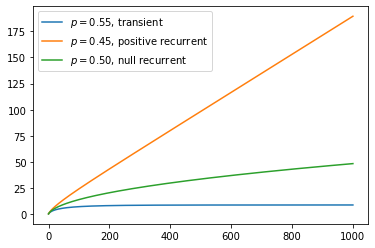

In [18]:
plt.plot(case1.cumsum(),label=r'$p=0.55$, transient', color='C0')
plt.plot(case2.cumsum(),label=r'$p=0.45$, positive recurrent', color='C1')
plt.plot(case3.cumsum(),label=r'$p=0.50$, null recurrent', color='C2')
plt.legend()